# Hierarchial Clustering
## Kumar Rahul

We will use beer data to perform hierarchial clustering using seaborn packages `clustermap`. This function derives some features from `scipy` package.

Refer to http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for refernce to available methods on hierarchial clustering.

The other option to achieve hierarchial clustering is to use `AgglomerativeClustering` from `sklearn.cluster`. More about it: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [1]:
import pandas as pd
import seaborn as sn


## 1. Preparing Data

Read data from a specified location


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
raw_df = pd.read_csv( "C:/Users/Administrator/Desktop/Data_Science_with_Python_and_R_ashish/Code files/Dataset/Hclust_Beer data.csv", 
                        sep = ',', na_values = ['', ' '])

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.head()

,id,beer,cal,sod,alc,cost
0,1,Budweiser,144,15,4.7,0.43
1,2,Schlitz,151,19,4.9,0.43
2,3,Lowenbrau,157,15,4.9,0.48
3,4,Kronenbourg,170,7,5.2,0.73
4,5,Heineken,152,11,5.0,0.77



## 2. Extract Features and Standardize

Two ways to extract the features:

> * use `pd.filter` and pass the list of features to extract for scaling
* Use `pd.drop` and pass the list of features which need not be extracted

The feature can also be extracted by using `dataframeName[[<name of features>]]` 


In [5]:
#feature_df = raw_df[['cal', 'sod', 'alc', 'cost']]

feature_df = raw_df.drop({'id','beer'}, axis =1)
col_names = feature_df.columns
#col_names

row_index = raw_df.iloc[:,1]
#row_index

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_scaled_df = pd.DataFrame(scaler.fit_transform( feature_df ))

feature_scaled_df.columns = col_names
feature_scaled_df.index = row_index 

Use `rename` function, in case renaming of a specific column or index is required

In [6]:
#feature_scaled_df.rename(index={'Budweiser':'Bud'}, inplace=True)

The referening of a row or column can be changed by using the below code chunk. Uncomment and change the values within `iloc` to understand how referencing works:

In [7]:
#ref_row_col = raw_df.iloc[:,:]
#ref_row_col

In [8]:
feature_scaled_df

,cal,sod,alc,cost
beer,,,,
Budweiser,0.393336,0.007795,0.351095,-0.470541
Schlitz,0.630693,0.631369,0.621168,-0.470541
Lowenbrau,0.834143,0.007795,0.621168,-0.114071
Kronenbourg,1.274950,-1.239354,1.026278,1.668282
Heineken,0.664602,-0.615780,0.756205,1.953459
Old Mil,0.427244,1.254943,0.216058,-1.539953
Augsburger,1.444491,1.410837,1.431387,-0.684423
Strohs,0.562877,1.878518,0.351095,-0.541835
Miller lite,-1.132535,-0.771673,-0.189051,-0.470541



## 3. Cluster and Visualize

Refer to http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for refernce to available methods, metric.

Rather than standardizing the values above We could have set `z_score` parameter inside the `clustermap` to 1 for standardizing the column values.

The other option to achieve hierarchial clustering is to use `AgglomerativeClustering` from `sklearn.cluster`. More about it: 
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

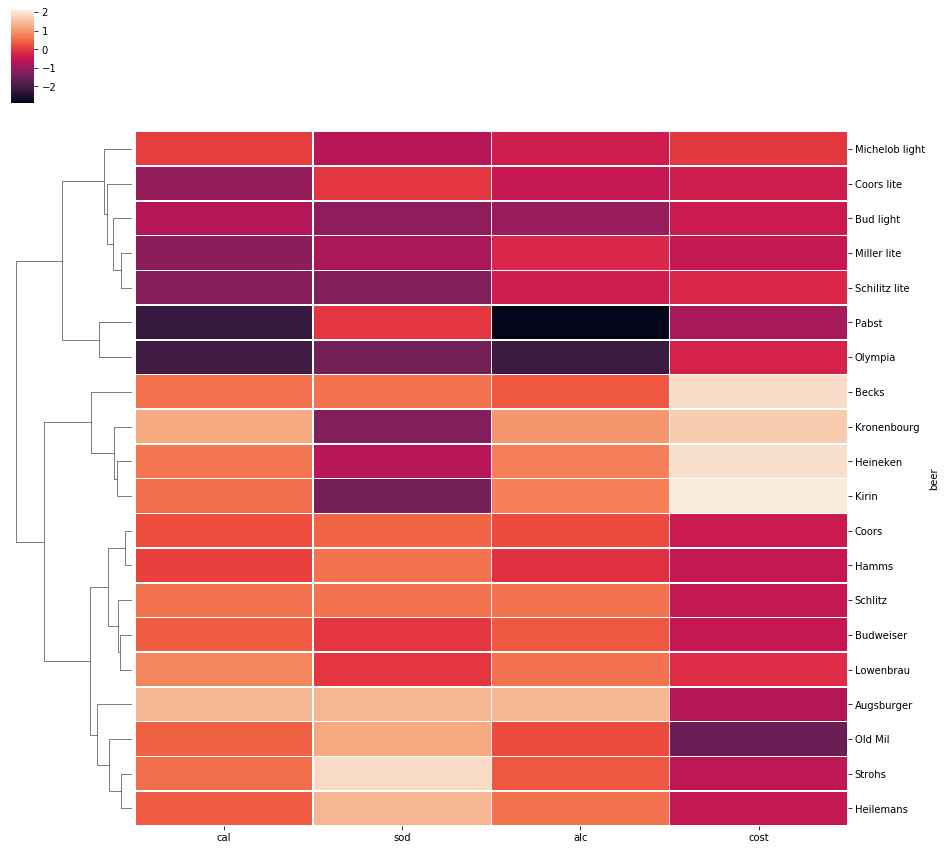

In [7]:
sn.clustermap(feature_scaled_df, method = 'complete', metric = 'euclidean', 
              row_cluster=True,col_cluster = False,
              linewidths=.5,figsize =(15,15))